# Visualization

Swan offers many different visualization options to understand your transcriptomes. The main units of these visualizations include:
* [Gene summary graphs](#gene_summary)
* [Transcript path graphs](#transcript_path)
* [Saving a figure](#save_fig)
* [Swan reports](#swan_report)

In [1]:
%matplotlib inline
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.SwanGraph('data/swan.p')

Graph from data/swan.p loaded


## <a name="gene_summary"></a>Gene summary graphs
Gene summary graphs display a high-level summary of the complexity of splicing within a certain gene locus. All observed splice sites and splice junctions from input datasets, and the annotation (if added) are plotted in full color. Genes can be called to be plotted either using their gene ids or gene names, but we recommend using gene ids as we have encountered redundant gene names during testing.

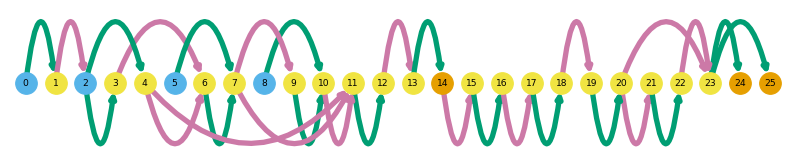

In [2]:
sg.plot_graph('ADRM1')

Gene summary graphs are a type of graph plot and therefore have plotting options that allow the user to highlight nodes and edges that are either not present in the annotation (`indicate_novel`) or those that come from a specific dataset (`indicate_dataset`).

For instance, say we want to highlight the nodes and edges that are not seen in the annotation. In this representation, nodes (splice sites) that are not present in the annotation will appear outlined, and intronic or exonic regions (edges) that are not present in the annotation will appear dashed.  

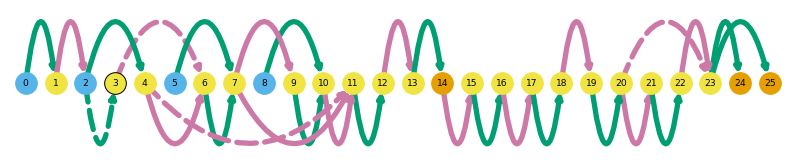

In [3]:
sg.plot_graph('ADRM1', indicate_novel=True)

Similarly, you can highlight the nodes that come from a specific dataset. Outlined nodes and dashed edges are those that are present in the queried dataset.

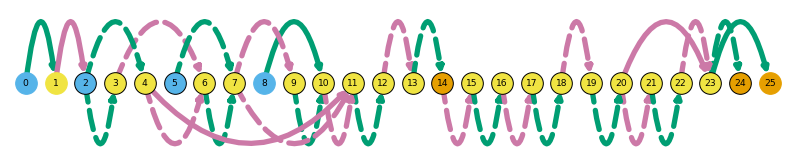

In [4]:
sg.plot_graph('ADRM1', indicate_dataset='HepG2_1')

## <a name="transcript_path"></a>Transcript path graphs


Transcript path graphs display the same structure as gene summary graphs but gray out nodes and edges (splice sites and intronic/exonic regions) that are not present in the given transcript. In this case, the transcript id field is needed to plot the path.

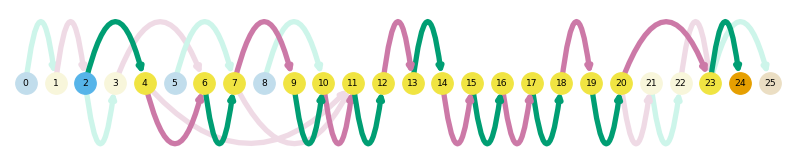

In [5]:
sg.plot_transcript_path('TALONT000301953')

There are also `indicate_novel` and `indicate_dataset` options that allow the user to highlight the nodes and edges that are not present in the annotation.

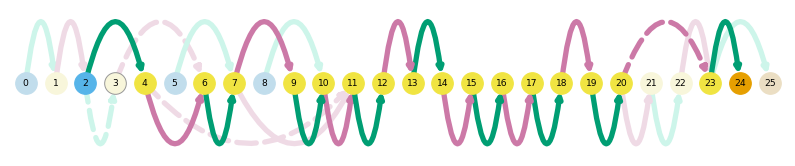

In [6]:
sg.plot_transcript_path('TALONT000301953', indicate_novel=True)

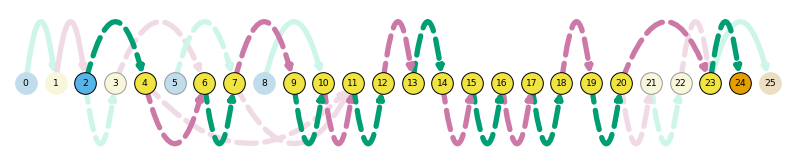

In [7]:
sg.plot_transcript_path('TALONT000301953', indicate_dataset='HFFc6_1')

For transcripts, there is also a unique option that allows you to generate the genome-browser style representation of a transcript, using the `browser` option.

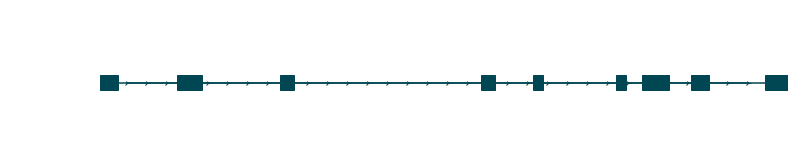

In [8]:
sg.plot_transcript_path('TALONT000301953', browser=True)

## <a name="save_fig"></a>Saving a figure

Saving a figure in Swan for `plot_graph` and for `plot_transcript_path` can be done in two different ways.

The first way involves calling `save_fig` after your figure has been generated. This method allows you to give your figure whatever name you want.

In [4]:
sg.plot_graph('ADRM1')
swan.save_fig('figures/my_gene_summary.png')

![](figures/my_gene_summary.png)

The second way only requires one line of code and requires that the user pass the corresponding plotting function a `prefix` for the filename and path. The file will be automatically named according to the settings in the graph.

In [5]:
sg.plot_graph('ADRM1', indicate_novel=True, prefix='figures/adrm1')

Saving summary graph for ENSG00000130706.12 as figures/adrm1_novel_ENSG00000130706.12_summary.png


As you can see, here the gene name ADRM1 is not used to save the figure because we have encountered conflicing gene names in our internal use of Swan. To avoid these clashes, Swan automatically fetches the gene id associated with the first instance of the gene name it finds and uses it to save the graph, in the interest of not accidentally overwriting a preexisting file.

![](figures/adrm1_novel_ENSG00000130706.12_summary.png)

## <a name="swan_report"></a>Swan reports

Swan reports display all the expressed transcripts in a given gene in a PDF format. There are many ways to customize these reports so here are a few. Unlike the above plotting options, the user must provide a `prefix` argument as there are many files that must be automatically generated to create the report.

Here's the one shown in the paper.

In [11]:
sg.gen_report('ADRM1',
              prefix='figures/adrm1_paper',
              heatmap=True,
              include_qvals=True,
              novelty=True, 
              indicate_novel=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_paper_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_paper_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_paper_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_paper_novel_TALONT000301961_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_paper_novel_TALONT000301953_path.png
Generating report for ENSG00000130706.12


![](figures/adrm1_paper_novel_ENSG00000130706.12_report.png)

In [12]:
sg.gen_report('ADRM1', prefix='figures/adrm1',
              dataset_groups=[['HepG2_1','HepG2_2'],['HFFc6_1','HFFc6_2']],
              dataset_group_names=['HepG2', 'HFFc6'],
              heatmap=True,
              indicate_novel=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_novel_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_novel_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_novel_TALONT000301927_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_novel_TALONT000301961_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_novel_TALONT000301953_path.png
Generating report for ENSG00000130706.12


![](figures/adrm1_novel_ENSG00000130706.12_summary.png)

In [2]:
sg.gen_report(['ADRM1','PSAP'], prefix='figures/multi_gene',
            datasets=['HepG2_1', 'HFFc6_1'],
            tpm=True,
            order='TSS')


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/multi_gene_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/multi_gene_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/multi_gene_TALONT000301927_path.png
Saving transcript path graph for TALONT000301953 as figures/multi_gene_TALONT000301953_path.png
Saving transcript path graph for TALONT000301961 as figures/multi_gene_TALONT000301961_path.png
Generating report for ENSG00000130706.12

Plotting transcripts for ENSG00000197746.13
Saving transcript path graph for ENST00000394936.7 as figures/multi_gene_ENST00000394936.7_path.png
Saving transcript path graph for TALONT000283514 as figures/multi_gene_TALONT000283514_path.png
Generating report for ENSG00000197746.13


![](figures/multi_gene_ENSG00000130706.12_report.png)
![](figures/multi_gene_ENSG00000197746.13_report.png)

In [3]:
sg.gen_report('ADRM1', prefix='figures/adrm1',
             heatmap=True,
             include_qvals=True, q=0.1,
             browser=True)


Plotting transcripts for ENSG00000130706.12
Saving transcript path graph for ENST00000253003.6 as figures/adrm1_browser_ENST00000253003.6_path.png
Saving transcript path graph for ENST00000620230.4 as figures/adrm1_browser_ENST00000620230.4_path.png
Saving transcript path graph for TALONT000301927 as figures/adrm1_browser_TALONT000301927_path.png
Saving transcript path graph for TALONT000301961 as figures/adrm1_browser_TALONT000301961_path.png
Saving transcript path graph for TALONT000301953 as figures/adrm1_browser_TALONT000301953_path.png
Generating report for ENSG00000130706.12


![](figures/adrm1_browser_ENSG00000130706.12_report.png)